1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [1]:
!pip install openpyxl
!pip install seaborn
!pip install scikit-learn



In [2]:
import pandas as pd 
import numpy as np

data=pd.read_excel("C:\\Users\\HP\\OneDrive\\Desktop\\datascience\\Decision Tree\\Decision Tree\\heart_disease.xlsx",sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


 # 2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.shape

(908, 13)

Check for missing values, outliers, and inconsistencies in the data.

In [5]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

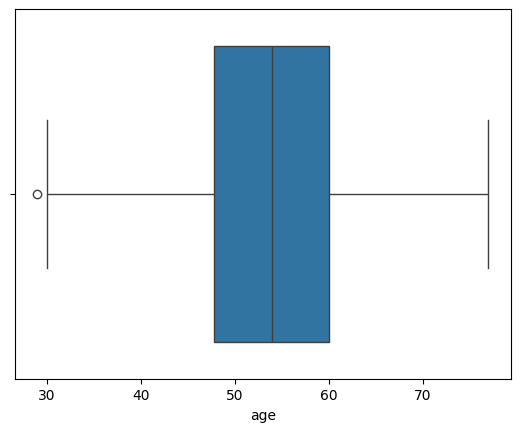

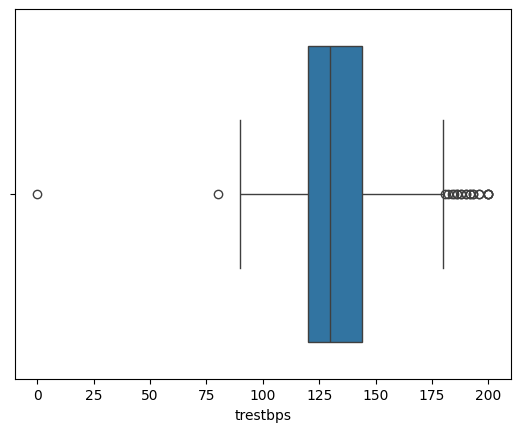

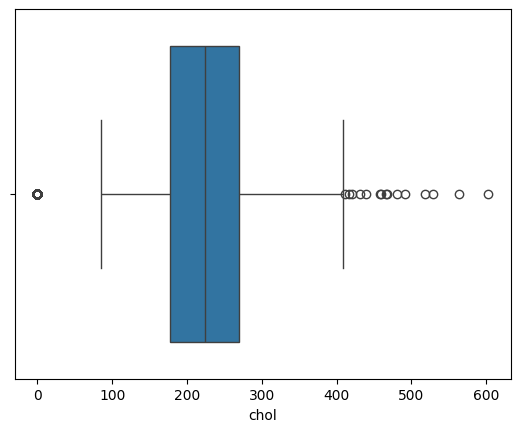

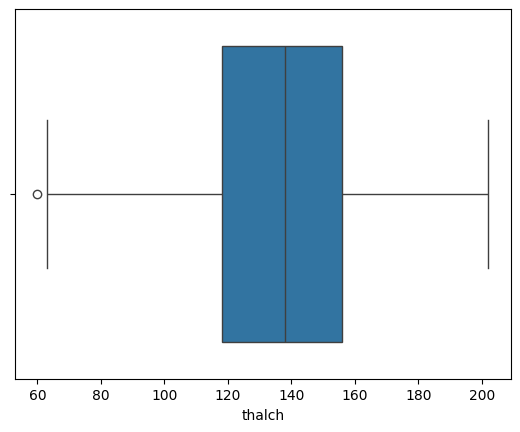

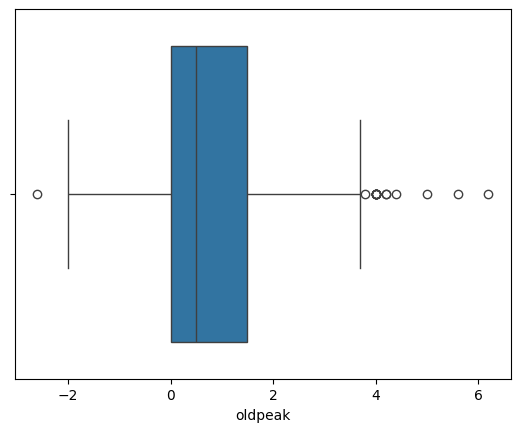

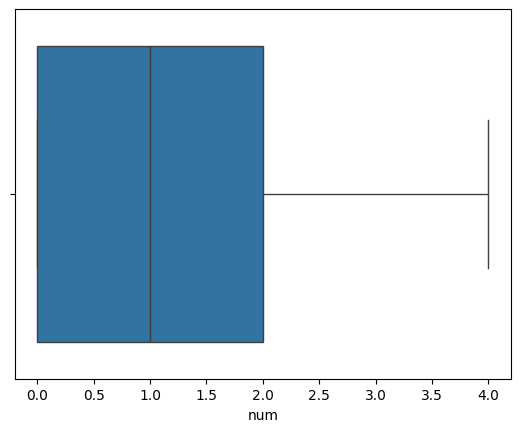

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data,x=i)
    plt.show()


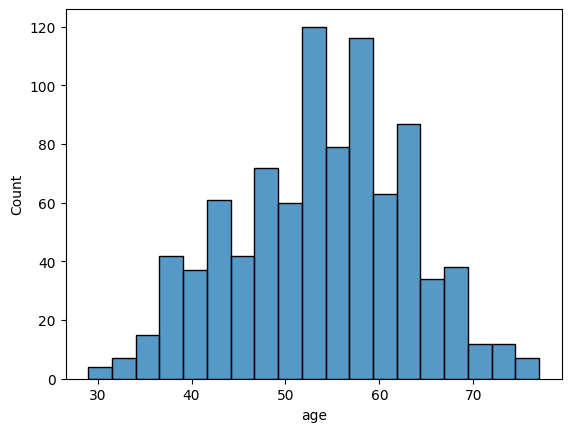

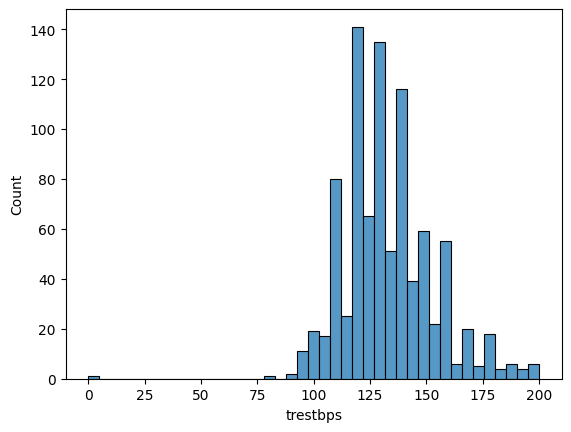

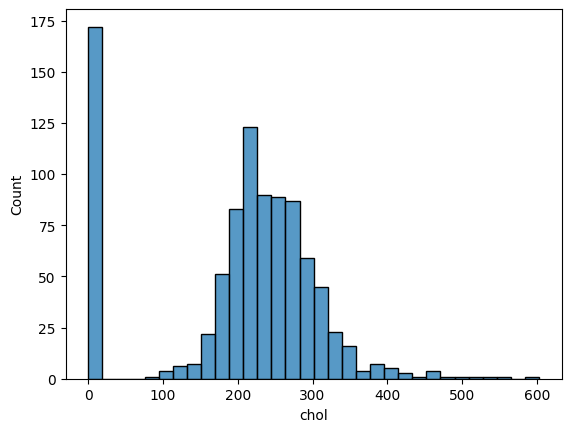

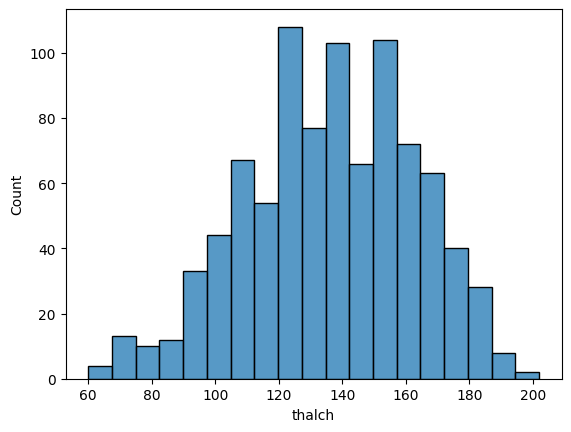

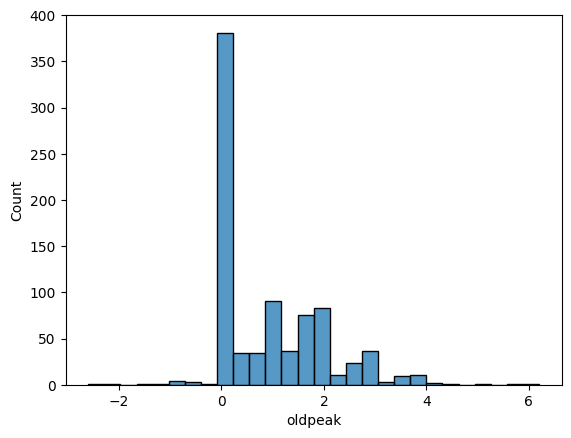

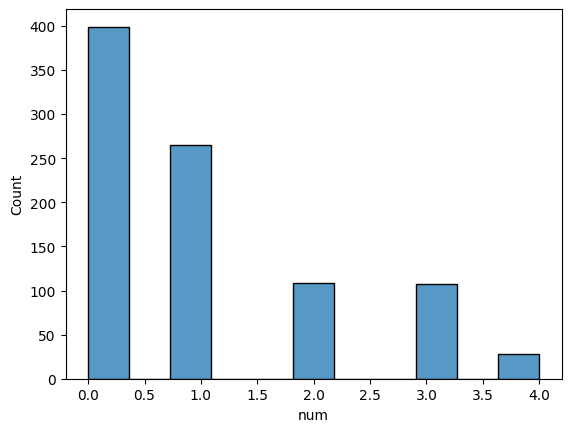

In [7]:
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data,x=i)
    plt.show()

In [8]:
data.select_dtypes(include='number').corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


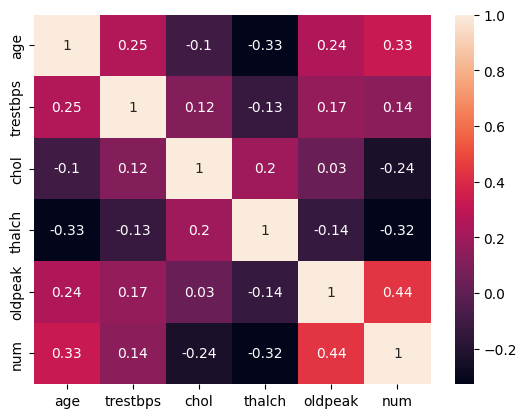

In [9]:

sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)
plt.show()

# 3 Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [10]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder().fit_transform(data['num'])
encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
data['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
data.num.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

 # 4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [13]:
dummies_df=pd.get_dummies(data)
df = dummies_df.fillna(0).astype(int)
df


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,2,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,0,148,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,0,190,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,1,4,0,1,1,...,1,0,0,0,0,0,1,0,0,1
904,62,166,170,0,120,3,4,0,1,1,...,0,1,0,0,0,1,0,0,0,1
905,56,170,0,0,123,2,4,0,1,0,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208,1,105,0,4,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [72]:
x=df.drop('num',axis=1)
x

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,2,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,0,148,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,0,190,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,1,0,1,1,0,...,1,0,0,0,0,0,1,0,0,1
904,62,166,170,0,120,3,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
905,56,170,0,0,123,2,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208,1,105,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0


In [73]:
y=df['num']
y


0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f'x_train:{x_train}')
print('-'*30)
print(f'y_train:{y_train}')
print('-'*30)
print(f'x_test:{x_test}')
print('-'*30)
print(f'y_test:{y_test}')

x_train:     age  trestbps  chol  fbs  thalch  oldpeak  sex_Female  sex_Male  \
84    42       120   295    0     162        0           0         1   
10    30       170   237    0     170        0           1         0   
617   74       140   237    1      94        0           0         1   
250   41       104     0    0     111        0           0         1   
869   49       137   142    0      68        0           0         1   
..   ...       ...   ...  ...     ...      ...         ...       ...   
106   63       135   252    0     172        0           1         0   
270   37       120   260    0     130        0           1         0   
860   48       140   374    0     159        1           0         1   
435   57       154   232    0     164        0           0         1   
102   60       150   240    0     171        0           1         0   

     cp_asymptomatic  cp_atypical angina  ...  exang_False  exang_True  \
84                 0                   1  ...        

In [17]:
print(x_train.shape)
print(y_train.shape)
 # Check for missing values in labels


(726, 25)
(726,)


Implement a Decision Tree Classification model using a library like scikit-learn.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_model=DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(x_train,y_train)
decision_model


DecisionTreeClassifier(criterion='entropy', max_depth=3)

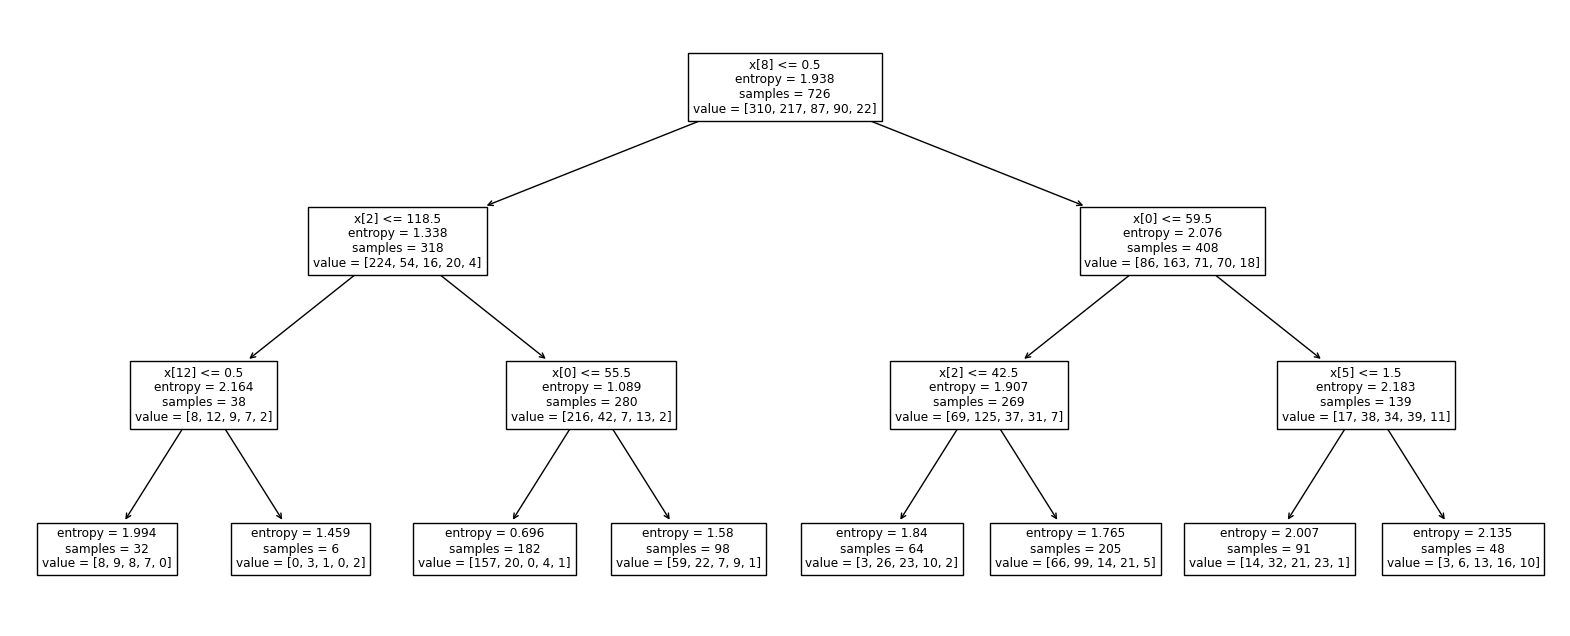

In [19]:
plt.figure(figsize=(20,8))
tree.plot_tree(decision_model);

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [20]:
#predicting the x_test how heart disease is  heart disease (1),heart disease (0),heart disease  with some other condition(3)
preds=decision_model.predict(x_test)
preds

array([1, 1, 0, 3, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       1, 1, 1, 1, 1, 0])

In [21]:
# doing cross rabel for actual values to predict values
pd.crosstab(y_test,preds)

col_0,0,1,3
num,,,
0,67,21,1
1,12,36,0
2,2,17,3
3,3,13,1
4,1,4,1


evaluation metrics 

In [22]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(preds,y_test)
accuracy

0.5714285714285714

# 5. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

GridSearch -Hyperparamter

In [31]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param={
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20]
}
grid_search=GridSearchCV(estimator=decision_model,param_grid=param,cv=5,scoring='accuracy').fit(x_train,y_train)
grid_search


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

displaying the best parmaters and their accuracy score 

In [35]:
print(f'best paramters:{grid_search.best_params_}')
print(f'best score:{grid_search.best_score_}')

best paramters:{'max_depth': 3, 'min_samples_split': 2}
best score:0.5193197921587152


Randomsearch- Hyperparamter

In [45]:
from scipy.stats import randint

random_params={ 'max_depth':[2,5,4],
                'min_samples_split':randint(2,20)}

Random_search=RandomizedSearchCV(estimator=decision_model,param_distributions=random_params,n_iter=10,cv=5,scoring='accuracy',random_state=42).fit(x_train,y_train)
Random_search

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3),
                   param_distributions={'max_depth': [2, 5, 4],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027AF184BB50>},
                   random_state=42, scoring='accuracy')

In [46]:
print(f'best paramters:{Random_search.best_params_}')
print(f'best score:{Random_search.best_score_}')
best_model=Random_search.best_estimitaor

best paramters:{'max_depth': 4, 'min_samples_split': 16}
best score:0.5330278696268305


# 6. Model Evaluation and Analysis:

Analyse the performance of the best  Decision Tree model using the evaluation metrics obtained.

grid_search_predicts

In [56]:
best_model_grid=grid_search.best_estimator_
y_preds_grid=best_model_grid.predict(x_test)
print(y_preds_grid)
print("Test Set Accuracy with grid Search:", accuracy_score(y_test, y_preds_grid))

[1 1 0 3 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 3 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 3 1 1
 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 3 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 3 1 0 1 0 1 0 3 1 1 1 1 1 0]
Test Set Accuracy with grid Search: 0.5714285714285714


ramdom_sesarch predicts

In [57]:
best_model_random=Random_search.best_estimator_
y_preds_random=best_model_random.predict(x_test)
print(y_preds_random)
print("Test Set Accuracy with Random Search:", accuracy_score(y_test, y_preds_random))

[1 3 0 3 1 1 1 0 1 3 1 0 0 0 0 0 0 0 0 3 0 0 1 1 0 3 0 0 0 0 0 3 0 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 3 3 0 1 0 0 3 1 0 3 1 0 1 0 0 0 3 0 3 0 0 3 1 1
 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 3 0 0 0 1 0 0 0 0 0 1 0 1 0 3 1 1 0 1 1
 0 1 3 0 3 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 3 0 1 0 0 0 0 0 0 0
 3 0 0 0 0 3 0 0 1 0 0 0 1 0 0 1 0 0 0 1 3 1 0 1 0 3 0 3 1 1 3 1 1 0]
Test Set Accuracy with Random Search: 0.554945054945055


Visualize the decision tree structure to understand the rules learned by the model and identify important features

best_model grid visualization

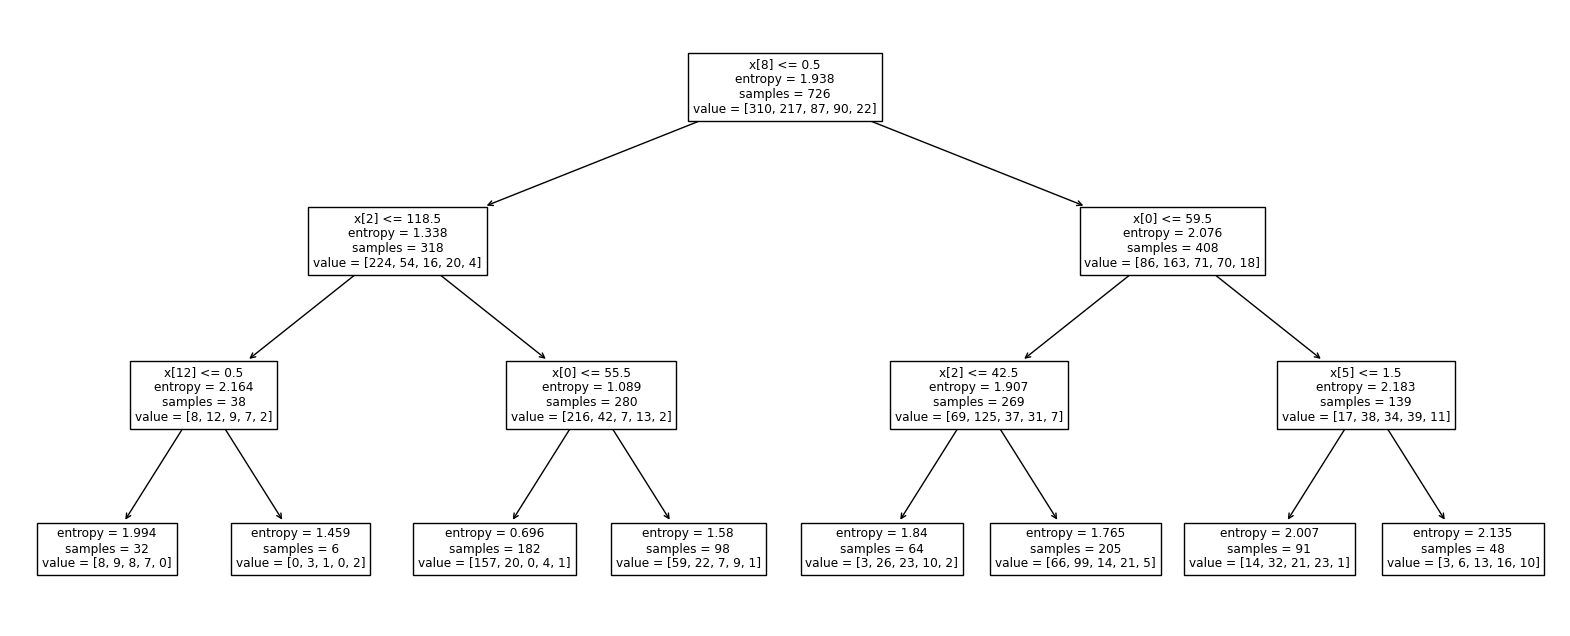

In [58]:
plt.figure(figsize=(20,8))
tree.plot_tree(best_model_grid);

best model random visulization

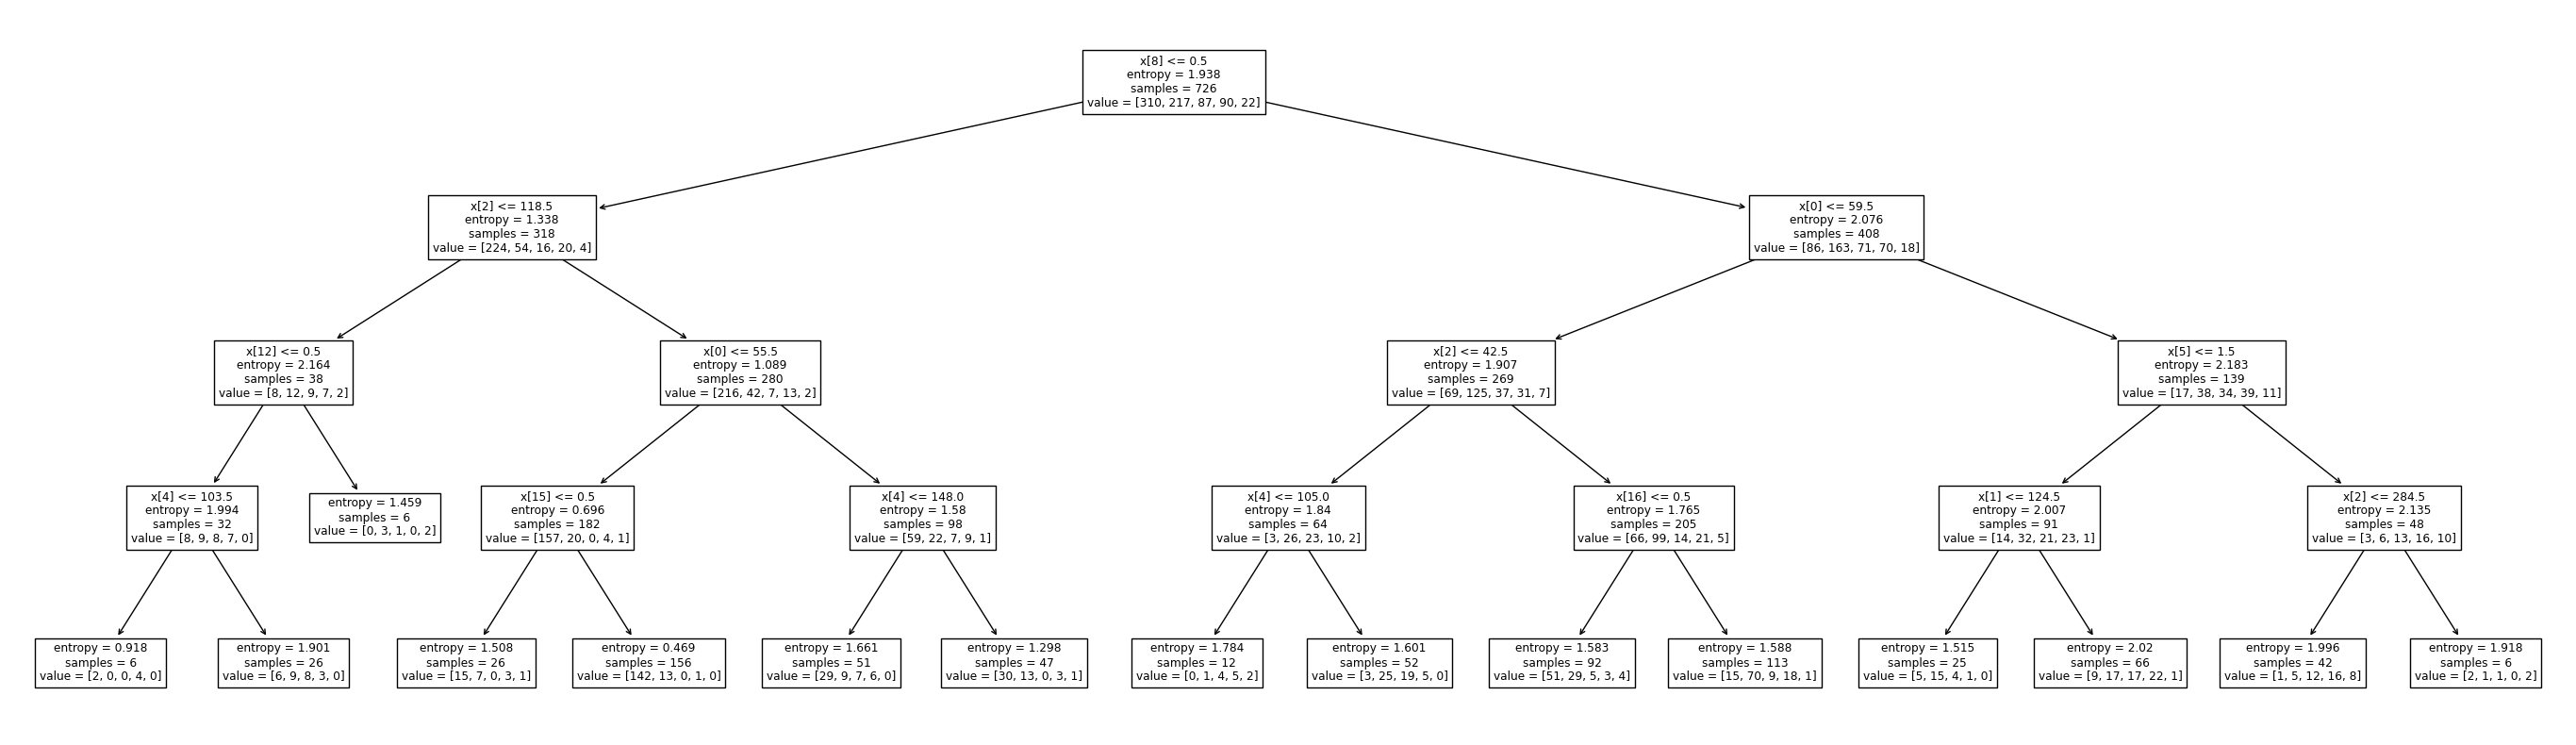

In [70]:
plt.figure(figsize=(35,10))
tree.plot_tree(best_model_random);

grid plot tree

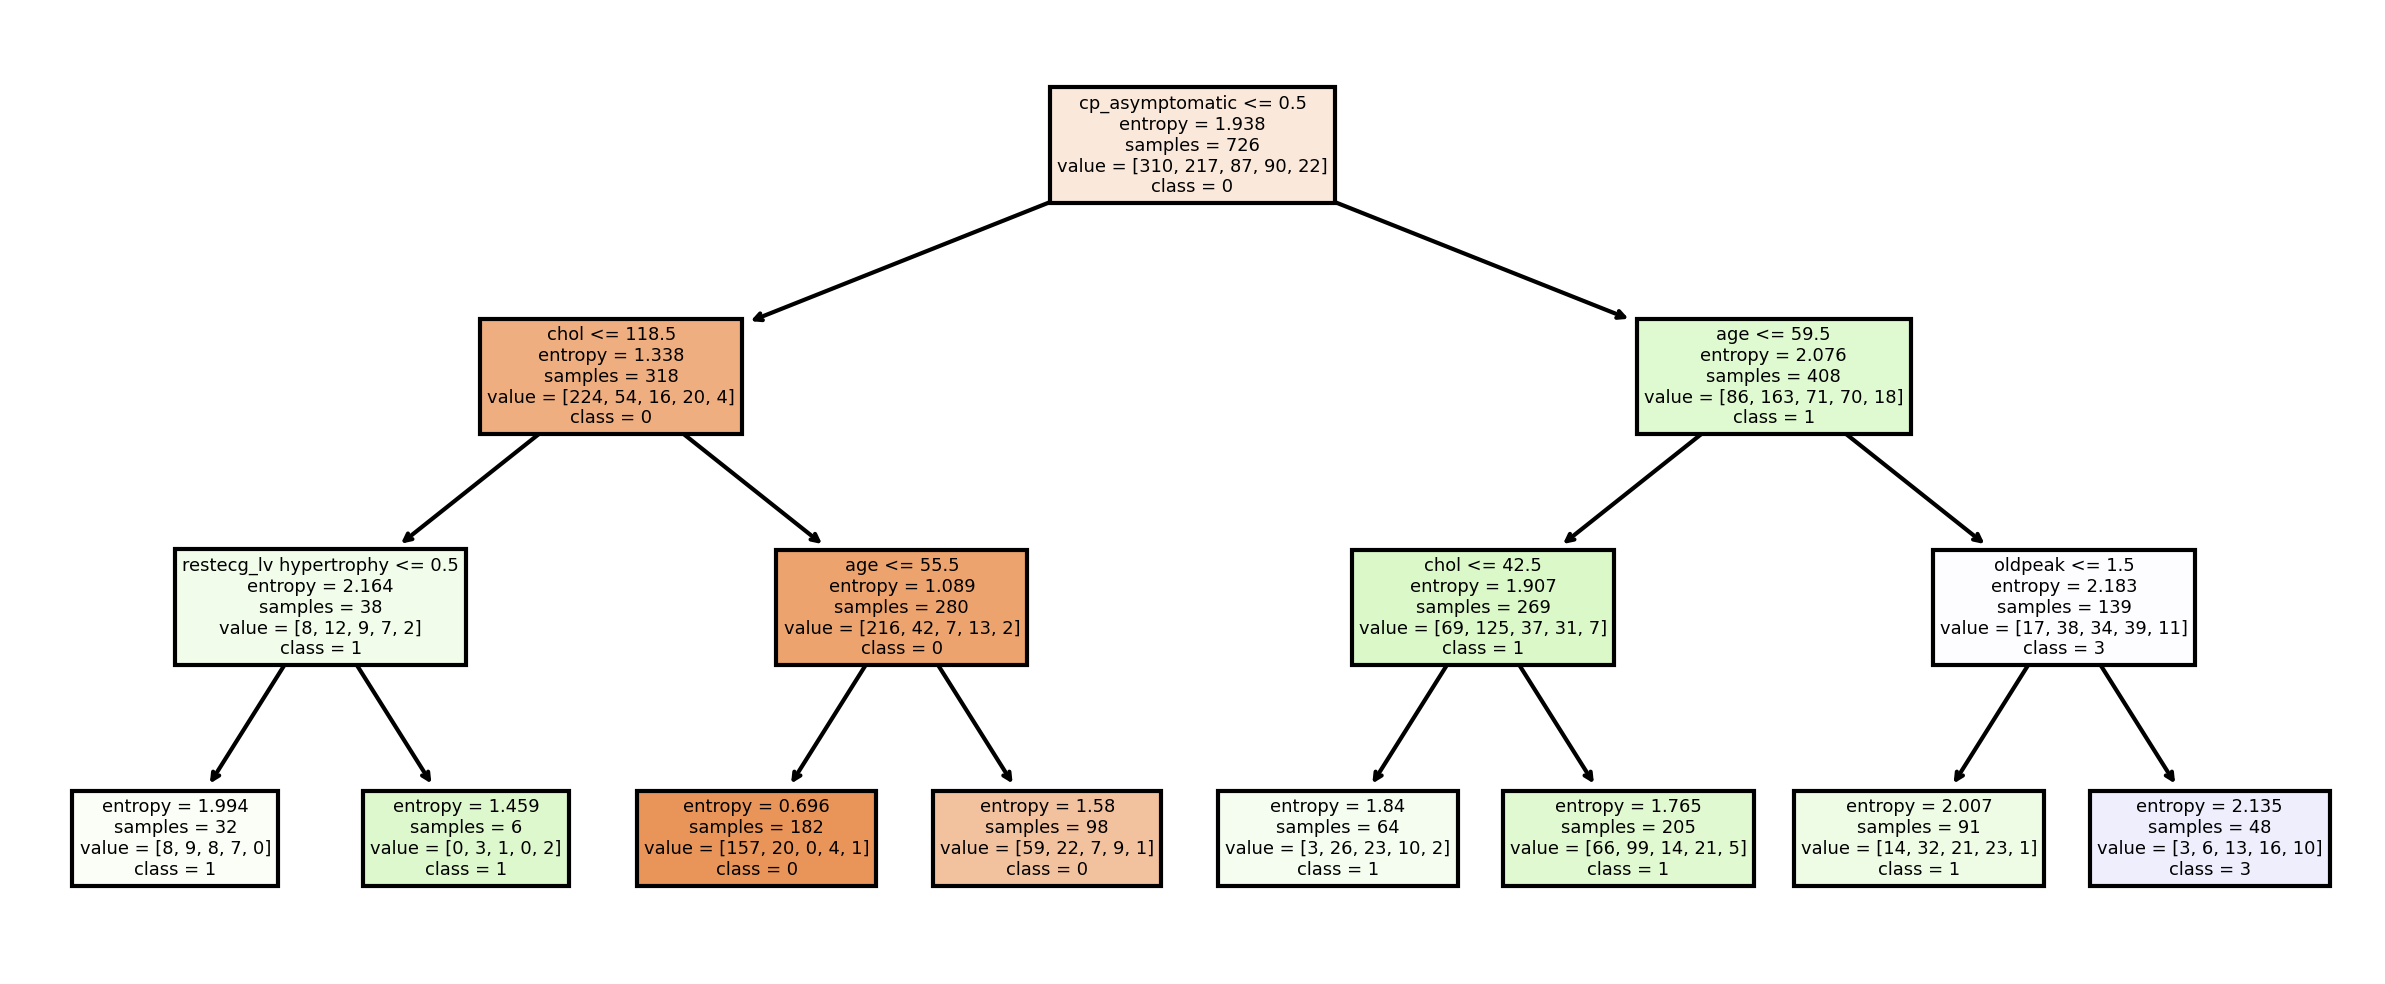

In [79]:
features = x.columns.tolist() 
targets=[str(target) for target in y.unique()]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=300)
tree.plot_tree(best_model_grid,
               feature_names = features, 
               class_names=targets,
               filled = True);
plt.show()

random plot tree 

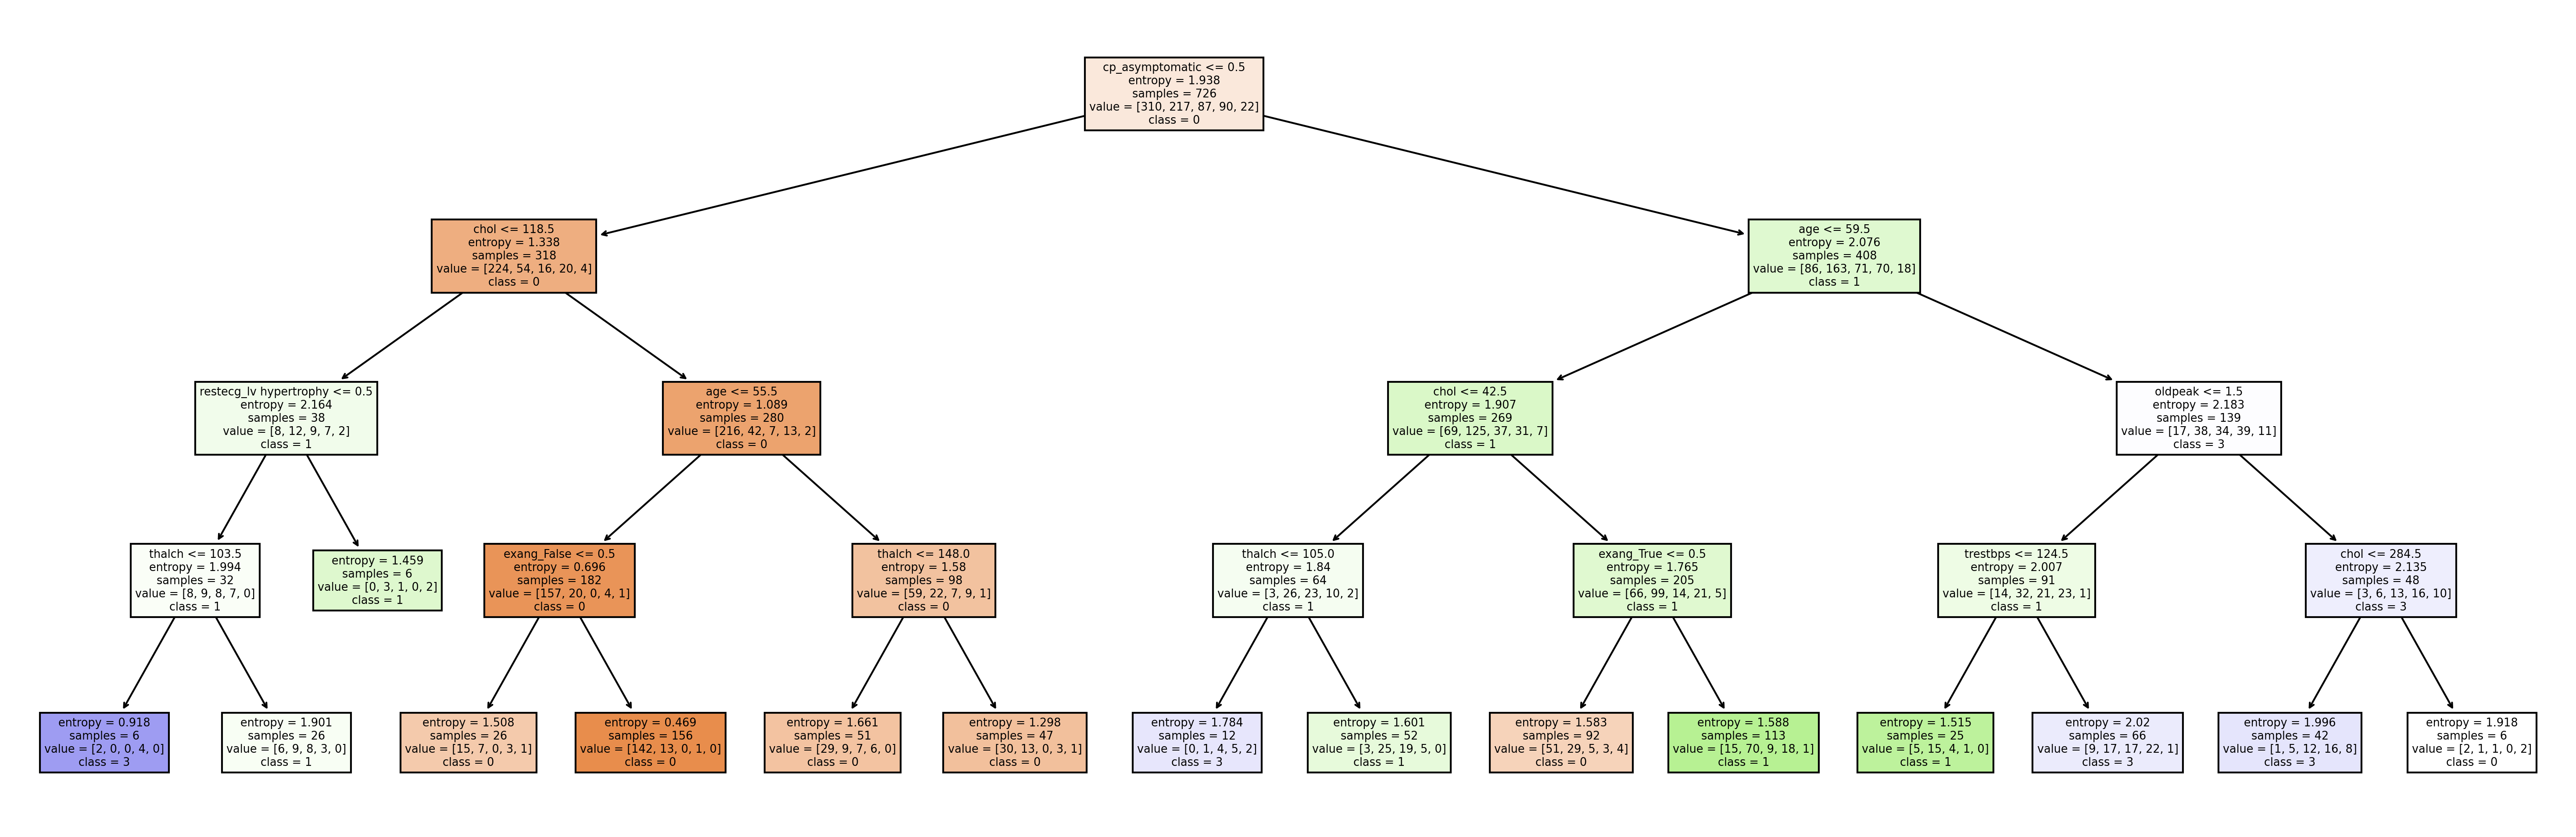

In [85]:
features = x.columns.tolist() 
targets=[str(target) for target in y.unique()]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,8), dpi=300)
tree.plot_tree(best_model_random,
               feature_names = features, 
               class_names=targets,
               filled = True);
plt.show()

 # Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Hyperparamter is techinque which is used to perform model better 

commomn hyperparamter of decision tree model is GridSearch and RandomSearch 

they affect the model's performance like taking the best parameters combinations and compare model  performance


2. What is the difference between the Label encoding and One-hot encoding?

# label encoding

lable encoding  is to covert categriocal data to numerical data  but written pattern is take label the interger to each class 
like low-0,medium-1,high-3 

Output:Integer labels

Ordering:May imply order

Dimensionality:Adds one column	

Use Case:Ordinal variables

# one hot encoding

one hot encoding is also to covert categriocal data to numerical it  divides the class to separet column and is presents-1 if not-0 like "yes" or "no" condition

output:Binary columns for each category

ordering:Does not imply any order

Dimensionality:Adds as many columns as categories

Use Case:Nominal variables
 